<img src="./logo_utn_frba.jpg" width="500">

### ***Teoría de los Circuitos II***
#### Torres Molina Emmanuel
#### **Legajo:** 146568-5

 ## Desafío Pasa-Bajos:

1) *Diseñar un Filtro Pasa-Bajos cuya Plantilla es:*

* fp = 500 Hz
* fs = 1500 Hz
* alfa_máx = 1dB
* alfa_mín = 1dB

# Respuestas al Desafío:

In [3]:
# Paquetes y Módulos que Utilizo en Jupyter

%matplotlib inline
from IPython.display import Image as img
from scipy.signal import TransferFunction as tf
import scipy.signal as sig
from splane import bodePlot, pzmap
import numpy as np

# Plantilla de Requerimientos:
a_max = 1 # Atenuación Máxima en la Banda de Paso
a_min = 18 # Atenuación mínima en la Banda de Stop

# Frecuencias y Pulsaciones Angulares:
fp = 500
fs = 1500
wp = 2 * np.pi * fp
ws = 2 * np.pi * fs

# Valores Normalizados
wp_prima = wp / wp
ws_prima = ws / wp

# Calculo del epsilon
eps = np.sqrt (10 ** (a_max/10) - 1) #Ripple 

# a) Filtro Pasa-Bajos Máxima Planicidad:

In [6]:
# Cálculo y Valores Obtenidos de la Plantilla Solicitada para Máxima Planicidad:

# Orden del Filtro
N = np.log10 (((10 ** (a_min/10) - 1) / eps**2)) / (2 * np.log10 (ws_prima))
N = np.ceil ( N ) # Redondeo para Arriba

print ("El valor del epsilon obtenido es: ", eps)
print ("\nEl Orden del Filtro es: ", N)


El valor del epsilon obtenido es:  0.5088471399095875

El Orden del Filtro es:  3.0




##### **Imágenes Correspondientes a la Resolución del Ejercicio:**

**$$Hoja Nro. 1:$$**
<img src="./max_planic_hoja1.jpeg" width = "500">

**$$ Hoja Nro. 2:$$**
<img src='./max_planic_hoja2.jpeg' width = "500">

# b) Filtro Pasa-Bajos Chebyshev:

In [7]:
# Cálculo y Valores Obtenidos de la Plantilla Solicitada para Máxima Planicidad:

# Orden del Filtro
N = np.arccosh ( np.sqrt (10**(a_min/10)/eps**2)) /  np.arccosh(ws_prima)  
N = np.ceil ( N ) # Redondeo para Arriba

print ("El valor del epsilon obtenido es: ", eps)
print ("\nEl Orden del Filtro es: ", N)

El valor del epsilon obtenido es:  0.5088471399095875

El Orden del Filtro es:  2.0


In [4]:
# Cálculo de los Coeficientes de mi Transferencia de Chebyshev:

NUM = np.array ( [1.1] )
DEN = np.array ( [1, 1.306, 1.1] )

my_tf = tf ( NUM, DEN )
my_tf



TransferFunctionContinuous(
array([1.1]),
array([1.   , 1.306, 1.1  ]),
dt: None
)

In [25]:
# Obtengo los Ceros, Polos y K (Ganancia) de mi Diseño:
z, p, k = sig.tf2zpk ( NUM, DEN )
z, p, k

(array([], dtype=float64), array([-0.653+0.8207259j, -0.653-0.8207259j]), 1.1)

(1,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE1CE09708>,
       dtype=object))

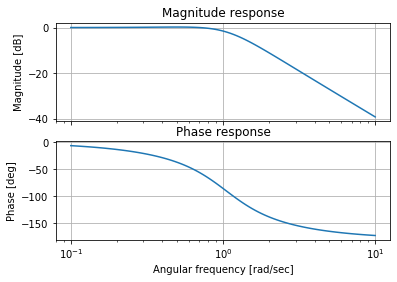

In [9]:
# Respuesta de Módulo y Fase:
bodePlot(my_tf)

(1, <matplotlib.axes._subplots.AxesSubplot at 0x1ee1bc85348>)

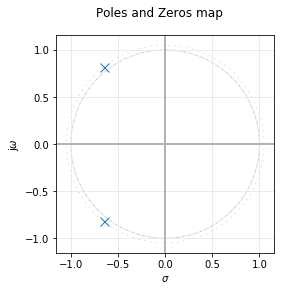

In [6]:
# Diagrama de Polos y Ceros:
pzmap (my_tf)